# Coursera Applied Data Science Capstone Project
### This repository is created as part of my Coursera capstone project

# Comparison of Food Choices of Cochin and Calicut cities

## Introduction
### Cochin and Calicut are two of the main cities in the Inidan State of Kerala. Geographically these places are located within a distance of 200Km but we can see a big difference in culture, cuisine, language etc between the people of these cities. These cities are also two of the biggest economic hubs of the state. In Calicut, service sector dominates the economy followed by industries. The city also has a strong mercantile aspect. Investments in IT is still in the beginning stage. 

### Kochi is often referred as the commercial and financial capital of Kerala. Availability of electricity, fresh water, long coastline, backwaters, good banking facilities, presence of a major port, container trans-shipment terminal, harbour terminal and an international air terminal are some of the factors which accelerated the industrial growth in the city and its adjoining district. In recent years the city has witnessed heavy investment, thus making it one of the fastest-growing second-tier metro cities in India. The district contributes 15.1% of the state GDP. Construction and manufacturing industries combined contributes 37% of the district's total GDP, and trade, tourism and hospitality industries together provides another 20%. Major business sectors include construction, manufacturing, shipbuilding, transportation/shipping, seafood and spices exports, chemical industries, information technology (IT), tourism, health services, and banking.

### This project is a comparitive study of food choices of Kochi and Calicut to understand how much the econmical and cultural differences can affect the food preferences of people. This project is useful for restaurant chains who want to start their outlets in diffrent locations to customize their offerings based on the intereset of people of the respective locations.


## Data to be used
### The analysis will be based on the location data obtained from FourSquare. First we need to understand the type of restaurants which are mostly present in these two cities.From that information, we can extract the preferred cuisines in each cities. We will also get insight into combination of cuisine and premium/cheap dining. 

### Eg. We can get the ratio of Non-veg and veg restaurants in both cities. From which we can understand whether Non-veg is preferred over veg or vice versa. From the total number of cuisines available we can see how broad is the food choices of each city. 

In [69]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import numpy as np
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import folium
from sklearn.cluster import KMeans
import json
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import geocoder
print('Libraries Imported')

Libraries Imported


### Fetching details of Neighbourhoods

In [70]:
url = "https://www.indiatvnews.com/pincode/kerala/ernakulam/kochi"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,'html5lib')
place = []
pincode_data = soup.find('table', class_ = 'alt')
for pin_info in pincode_data.find_all('th'):
    place.append(pin_info.text)
pin_df = pd.DataFrame(columns = place)
for office_name_row in pincode_data.find_all('tr'):
    of_dat = []
    for office_name_dat in office_name_row.find_all('td'):
        of_dat.append(office_name_dat.text)
    if(len(of_dat) != 0):
        a_series = pd.Series(of_dat, index = pin_df.columns)
        pin_df = pin_df.append(a_series, ignore_index = True)


In [71]:
pin_df_kochi = pin_df[(pin_df['Taluk'] == 'Kochi')|(pin_df['Taluk'] =='Ernakulam')]
pin_df_kochi.reset_index(drop = True, inplace = True)
pin_df_kochi

,Office,Taluk,District,State,Pincode
0,Palliport,Kochi,Ernakulam,KERALA,683515
1,Amballur,Ernakulam,Ernakulam,KERALA,682315
2,Andikkadavu,Kochi,Ernakulam,KERALA,682008
3,Ayyampilly,Kochi,Ernakulam,KERALA,682501
4,Azheekal,Kochi,Ernakulam,KERALA,682508
5,Chellanam,Kochi,Ernakulam,KERALA,682008
6,Cheranallur,Ernakulam,Ernakulam,KERALA,682034
7,Chittoor ekm,Ernakulam,Ernakulam,KERALA,682027
8,Cochin Special Economic Zone,Ernakulam,Ernakulam,KERALA,682037
9,Edakochi,Kochi,Ernakulam,KERALA,682010


In [72]:
pin_df_kochi = pin_df_kochi[(pin_df_kochi['Office'] != 'Andikkadavu') & (pin_df_kochi['Office'] != 'Ernakulam Hindi Prachar Sabha') & (pin_df_kochi['Office'] != 'Kadamakudi') & (pin_df_kochi['Office'] != 'Kannamali') & (pin_df_kochi['Office'] != 'Kochi Naval Base') & (pin_df_kochi['Office'] != 'Kuttikkattukara') & (pin_df_kochi['Office'] !='Thiruvamkulam') & (pin_df_kochi['Office'] != 'Chittoor ekm') & (pin_df_kochi['Office'] != 'Kaipatoor') & (pin_df_kochi['Office'] != 'Kusumagiri') & (pin_df_kochi['Office'] != 'Mattancherry Jetty') & (pin_df_kochi['Office'] != 'Tripunithura Fort')]
pin_df_kochi.reset_index(drop = True, inplace = True)
pin_df_kochi

,Office,Taluk,District,State,Pincode
0,Palliport,Kochi,Ernakulam,KERALA,683515
1,Amballur,Ernakulam,Ernakulam,KERALA,682315
2,Ayyampilly,Kochi,Ernakulam,KERALA,682501
3,Azheekal,Kochi,Ernakulam,KERALA,682508
4,Chellanam,Kochi,Ernakulam,KERALA,682008
5,Cheranallur,Ernakulam,Ernakulam,KERALA,682034
6,Cochin Special Economic Zone,Ernakulam,Ernakulam,KERALA,682037
7,Edakochi,Kochi,Ernakulam,KERALA,682010
8,Edapally North,Ernakulam,Ernakulam,KERALA,682024
9,Edapally,Ernakulam,Ernakulam,KERALA,682024


In [73]:
print('The dataframe has {} Taluks and {} offices.'.format(
        len(pin_df_kochi['Taluk'].unique()),
        pin_df_kochi.shape[0]
    )
)


The dataframe has 2 Taluks and 73 offices.


In [74]:

geolocator1 = Nominatim(user_agent="tr_explorer")
lat_lon = pd.DataFrame(columns = ['latitude','longitude'])
lat_lon
for index, row in pin_df_kochi.iterrows():
    address = row['Office'] +', ' + row['District']
    location1 = geolocator1.geocode(address)
    if(location1 != None):
        print(address)
        coord = pd.Series([location1.latitude,location1.longitude],index = lat_lon.columns)
        lat_lon = lat_lon.append(coord,ignore_index = True)
    else:
        print('X', address);
    # if(location1 != None):
    #     lat_lon['latitude'].iloc[index] = location1.latitude
    #     lat_lon['longitude'].iloc[index] = location1.longitude
# location1 = geolocator.geocode(address)
# latitude1 = location1.latitude
# longitude1 = location1.longitude
# print('The geograpical coordinate of Kochi are {}, {}.'.format(latitude1, longitude1))
# print(location1)

Palliport, Ernakulam
Amballur, Ernakulam
Ayyampilly, Ernakulam
Azheekal, Ernakulam
Chellanam, Ernakulam
Cheranallur, Ernakulam
Cochin Special Economic Zone, Ernakulam
Edakochi, Ernakulam
Edapally North, Ernakulam
Edapally, Ernakulam
Edavanakad, Ernakulam
Elamakkara, Ernakulam
Elamkunnapuzha, Ernakulam
Ernakulam College, Ernakulam
Ernakulam, Ernakulam
Ernakulam High Court, Ernakulam
Ernakulam North, Ernakulam
Eroor Ernakulam, Ernakulam
Eroor South, Ernakulam
Eroor West, Ernakulam
Irimbanam, Ernakulam
Kadavanthara, Ernakulam
Kakkanad, Ernakulam
Kakkanad West, Ernakulam
Kaloor, Ernakulam
Kochi, Ernakulam
Kochi M.G.Road, Ernakulam
Kochi Palace, Ernakulam
Kochi University, Ernakulam
Kothad, Ernakulam
Kumbalam, Ernakulam
Kumbalangi, Ernakulam
Kumbalangi South, Ernakulam
Malipuram, Ernakulam
Maradu, Ernakulam
Matsyapuri, Ernakulam
Mattancherry, Ernakulam
Mattancherry Town, Ernakulam
Mulanthuruthy, Ernakulam
Mulavukad, Ernakulam
Mundamveli, Ernakulam
Narakkal, Ernakulam
Nayarambalam, Ernakulam

In [75]:

pin_df_kochi['latitude'] = lat_lon['latitude']
pin_df_kochi['longitude'] = lat_lon['longitude']

<ipython-input-75-2faf5a38b7bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pin_df_kochi['latitude'] = lat_lon['latitude']
<ipython-input-75-2faf5a38b7bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pin_df_kochi['longitude'] = lat_lon['longitude']


### Creating a map of Kochi

In [76]:
# create map of Kochi using latitude and longitude values
map_kochi = folium.Map(location=[location1.latitude, location1.longitude], zoom_start=10)

# add markers to map
for lat, lng, Taluk, Office in zip(pin_df_kochi['latitude'], pin_df_kochi['longitude'], pin_df_kochi['Taluk'], pin_df_kochi['Office']):
    label = '{}, {}'.format(Office, Taluk)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kochi)  
    
map_kochi

Define Foursquare Credentials and Version

In [77]:
CLIENT_ID = 'J4I2WAJEINOGGWERVMKOIYECJDP3BL0B23524WTXGX00TYED' # your Foursquare ID
CLIENT_SECRET = 'E5YPAY4DNF2AN1HZ3KUSEJAIHJARRGPJ5T5VGFRT3CDPUNJK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
CATEGORY_ID = '4d4b7105d754a06374d81259'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J4I2WAJEINOGGWERVMKOIYECJDP3BL0B23524WTXGX00TYED
CLIENT_SECRET:E5YPAY4DNF2AN1HZ3KUSEJAIHJARRGPJ5T5VGFRT3CDPUNJK


### Get the neighbourhood's latitude and longitude

# Explore neighbourhoods in Kochi

### Get the top 100 venues from each of the neighbourhoods in Kochi

In [78]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            CATEGORY_ID)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues'] #[0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [79]:
kochi_venues = getNearbyVenues(names = pin_df_kochi['Office'],latitudes = pin_df_kochi['latitude'],
                                  longitudes = pin_df_kochi['longitude'])
# kochi_venues

Palliport
Amballur
Ayyampilly
Azheekal
Chellanam
Cheranallur
Cochin Special Economic Zone
Edakochi
Edapally North
Edapally
Edavanakad
Elamakkara
Elamkunnapuzha
Ernakulam College
Ernakulam
Ernakulam High Court
Ernakulam North
Eroor Ernakulam
Eroor South
Eroor West
Irimbanam
Kadavanthara
Kakkanad
Kakkanad West
Kaloor
Kochi
Kochi M.G.Road
Kochi Palace
Kochi University
Kothad
Kumbalam
Kumbalangi
Kumbalangi South
Malipuram
Maradu
Matsyapuri
Mattancherry
Mattancherry Town
Mulanthuruthy
Mulavukad
Mundamveli
Narakkal
Nayarambalam
Nazreth
Nedungad
North End
Ochanthuruth
Pachalam
Palarivattom
Palluruthy
Palluruthy South
Panampilly Nagar
Panayappilly
Perumanur
Pizhala
Poonithura
Puthuvype
Rajagiri Valley
S.Chellanam
Shanmugham Road
Thammanam
Thekkumbhagom
Thengod
Thevara
Thoppumpady
Thrikkakara
Tripunithura
Udayamperoor
Vaduthala
Vallarpadam
Vennala
Vyttila
Willingdon Island


In [69]:
print(kochi_venues.shape)
kochi_venues.head()

(2742, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palliport,10.169576,76.180716,Arathi's Southern Delite,10.178270,76.210625,Asian Restaurant
1,Palliport,10.169576,76.180716,Wimbis Bake,10.195283,76.171284,Bakery
2,Palliport,10.169576,76.180716,Salt'n'Pepper,10.140881,76.178995,Restaurant
3,Palliport,10.169576,76.180716,P.S fast food,10.151946,76.175224,Seafood Restaurant
4,Palliport,10.169576,76.180716,Lilliput,10.141301,76.179016,Multicuisine Indian Restaurant


In [70]:
kochi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Amballur,6,6,6,6,6,6
Ayyampilly,16,16,16,16,16,16
Azheekal,49,49,49,49,49,49
Chellanam,8,8,8,8,8,8
Cheranallur,46,46,46,46,46,46
Cochin Special Economic Zone,45,45,45,45,45,45
Edakochi,48,48,48,48,48,48
Edapally,47,47,47,47,47,47
Edapally North,47,47,47,47,47,47


### Let's find out how many unique categories can be curated from all the returned venues


In [71]:
print('There are {} uniques categories.'.format(len(kochi_venues['Venue Category'].unique())))

There are 73 uniques categories.


## Analyze each neighbourhood

In [72]:
# one hot encoding
kochi_onehot = pd.get_dummies(kochi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kochi_onehot['Neighborhood'] = kochi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kochi_onehot.columns[-1]] + list(kochi_onehot.columns[:-1])
kochi_onehot = kochi_onehot[fixed_columns]

kochi_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Czech Restaurant,Deli / Bodega,Dessert Shop,Dhaba,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Greek Restaurant,Halal Restaurant,Hotel,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Juice Bar,Kerala Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Multicuisine Indian Restaurant,Persian Restaurant,Pizza Place,Pub,Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Snack Place,South Indian Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Palliport,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Palliport,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Palliport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Palliport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Palliport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### And let's examine the new dataframe size.

In [73]:
kochi_onehot.shape

(2742, 74)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [74]:
kochi_grouped = kochi_onehot.groupby('Neighborhood').mean().reset_index()
kochi_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Czech Restaurant,Deli / Bodega,Dessert Shop,Dhaba,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Greek Restaurant,Halal Restaurant,Hotel,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Juice Bar,Kerala Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Multicuisine Indian Restaurant,Persian Restaurant,Pizza Place,Pub,Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Snack Place,South Indian Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Amballur,0.000000,0.000000,0.0,0.000000,0.166667,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.166667,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.166667,0.0,0.000000,0.166667,0.0,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.000000,0.0
1,Ayyampilly,0.000000,0.000000,0.0,0.125000,0.000000,0.062500,0.0625,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.062500,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.187500,0.0,0.0625,0.062500,0.062500,0.0,0.000000,0.0,0.000000,0.000000,0.1875,0.0,0.000000,0.0,0.0,0.125000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,Azheekal,0.000000,0.000000,0.0,0.020408,0.000000,0.020408,0.0000,0.0,0.020408,0.000000,0.0,0.0,0.122449,0.020408,0.0,0.0,0.000,0.000000,0.020408,0.0,0.020408,0.0,0.0,0.020408,0.0,0.0,0.0,0.040816,0.0,0.0,0.0,0.000000,0.000000,0.0,0.020408,0.0,0.0,0.040816,0.040816,0.020408,0.0,0.224490,0.0,0.0000,0.020408,0.020408,0.0,0.020408,0.0,0.020408,0.020408,0.0000,0.0,0.000000,0.0,0.0,0.081633,0.0,0.102041,0.0,0.020408,0.000000,0.0,0.0,0.0,0.0,0.040816,0.0,0.000000,0.0,0.0,0.000000,0.0
3,Chellanam,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.250000,0.000000,0.0,0.0,0.125,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.125000,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.125000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.125000,0.0
4,Cheranallur,0.021739,0.021739,0.0,0.000000,0.000000,0.043478,0.0000,0.0,0.021739,0.021739,0.0,0.0,0.065217,0.021739,0.0,0.0,0.000,0.043478,0.000000,0.0,0.000000,0.0,0.0,0.021739,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.021739,0.021739,0.0,0.043478,0.0,0.0,0.000000,0.000000,0.043478,0.0,0.239130,0.0,0.0000,0.043478,0.043478,0.0,0.000000,0.0,0.043478,0.000000,0.0000,0.0,0.021739,0.0,0.0,0.086957,0.0,0.000000,0.0,0.000000,0.043478,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.021739,0.0


In [75]:
kochi_grouped.shape

(73, 74)

#### Let's print each neighborhood along with the top 5 most common venues


In [76]:
num_top_venues = 5

for hood in kochi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kochi_grouped[kochi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amballur----
                venue  freq
0               Diner  0.17
1   Indian Restaurant  0.17
2           BBQ Joint  0.17
3    Theme Restaurant  0.17
4  Seafood Restaurant  0.17


----Ayyampilly----
                            venue  freq
0               Indian Restaurant  0.19
1  Multicuisine Indian Restaurant  0.19
2                      Restaurant  0.12
3                Asian Restaurant  0.12
4                          Bakery  0.06


----Azheekal----
                  venue  freq
0     Indian Restaurant  0.22
1                  Café  0.12
2    Seafood Restaurant  0.10
3            Restaurant  0.08
4  Fast Food Restaurant  0.04


----Chellanam----
                           venue  freq
0                           Café  0.25
1                         Bakery  0.25
2                     Restaurant  0.12
3  Vegetarian / Vegan Restaurant  0.12
4              Indian Restaurant  0.12


----Cheranallur----
               venue  freq
0  Indian Restaurant  0.24
1         Restaurant  0.0

#### Converting into dataframe

In [55]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Dataframe to display top 10 venues from each neighbourhood

In [78]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kochi_grouped['Neighborhood']

for ind in np.arange(kochi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kochi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amballur,Diner,Indian Restaurant,BBQ Joint,Theme Restaurant,Seafood Restaurant,South Indian Restaurant,Afghan Restaurant,Mexican Restaurant,Multicuisine Indian Restaurant,Molecular Gastronomy Restaurant
1,Ayyampilly,Indian Restaurant,Multicuisine Indian Restaurant,Restaurant,Asian Restaurant,Bakery,Bistro,Italian Restaurant,Juice Bar,Kerala Restaurant,Diner
2,Azheekal,Indian Restaurant,Café,Seafood Restaurant,Restaurant,Fast Food Restaurant,Hotel,Halal Restaurant,Tea Room,Middle Eastern Restaurant,Diner
3,Chellanam,Café,Bakery,Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Chinese Restaurant,Pizza Place,Persian Restaurant,Multicuisine Indian Restaurant,Molecular Gastronomy Restaurant
4,Cheranallur,Indian Restaurant,Restaurant,Café,Kerala Restaurant,Coffee Shop,Juice Bar,Fast Food Restaurant,South Indian Restaurant,Fried Chicken Joint,Middle Eastern Restaurant


## Cluster Neighbourhoods

### Run k-means to cluster neighbourhood into 5 clusters

In [79]:
# set number of clusters
kclusters = 5

kochi_grouped_clustering = kochi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kochi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 2])

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [80]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
kochi_merged = pin_df_kochi
print(pin_df_kochi.shape)
# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
kochi_merged = kochi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Office')

kochi_merged # check the last columns!

(73, 7)


,Office,Taluk,District,State,Pincode,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Palliport,Kochi,Ernakulam,KERALA,683515,10.169576,76.180716,0,Indian Restaurant,Multicuisine Indian Restaurant,Asian Restaurant,Restaurant,Bakery,Bistro,Seafood Restaurant,Kerala Restaurant,Snack Place,Eastern European Restaurant
1,Amballur,Ernakulam,Ernakulam,KERALA,682315,9.851833,76.408795,0,Diner,Indian Restaurant,BBQ Joint,Theme Restaurant,Seafood Restaurant,South Indian Restaurant,Afghan Restaurant,Mexican Restaurant,Multicuisine Indian Restaurant,Molecular Gastronomy Restaurant
2,Ayyampilly,Kochi,Ernakulam,KERALA,682501,10.126335,76.198371,0,Indian Restaurant,Multicuisine Indian Restaurant,Restaurant,Asian Restaurant,Bakery,Bistro,Italian Restaurant,Juice Bar,Kerala Restaurant,Diner
3,Azheekal,Kochi,Ernakulam,KERALA,682508,9.989438,76.241909,0,Indian Restaurant,Café,Seafood Restaurant,Restaurant,Fast Food Restaurant,Hotel,Halal Restaurant,Tea Room,Middle Eastern Restaurant,Diner
4,Chellanam,Kochi,Ernakulam,KERALA,682008,9.791248,76.278362,1,Café,Bakery,Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Chinese Restaurant,Pizza Place,Persian Restaurant,Multicuisine Indian Restaurant,Molecular Gastronomy Restaurant
5,Cheranallur,Ernakulam,Ernakulam,KERALA,682034,10.051266,76.289012,0,Indian Restaurant,Restaurant,Café,Kerala Restaurant,Coffee Shop,Juice Bar,Fast Food Restaurant,South Indian Restaurant,Fried Chicken Joint,Middle Eastern Restaurant
6,Cochin Special Economic Zone,Ernakulam,Ernakulam,KERALA,682037,10.004359,76.343244,0,Indian Restaurant,Bakery,Restaurant,Middle Eastern Restaurant,Café,Chinese Restaurant,Asian Restaurant,Ice Cream Shop,Juice Bar,Fried Chicken Joint
7,Edakochi,Kochi,Ernakulam,KERALA,682010,9.912891,76.282747,1,Bakery,Indian Restaurant,Fast Food Restaurant,Restaurant,Breakfast Spot,Burger Joint,Café,Juice Bar,Resort,BBQ Joint
8,Edapally North,Ernakulam,Ernakulam,KERALA,682024,10.025960,76.309969,0,Indian Restaurant,Ice Cream Shop,Juice Bar,Bakery,Chinese Restaurant,Fast Food Restaurant,Restaurant,Diner,Tea Room,Italian Restaurant
9,Edapally,Ernakulam,Ernakulam,KERALA,682024,10.025960,76.309969,0,Indian Restaurant,Ice Cream Shop,Juice Bar,Bakery,Chinese Restaurant,Fast Food Restaurant,Restaurant,Diner,Tea Room,Italian Restaurant


### Finally, let's visualize the resulting clusters

In [81]:
print(kochi_merged.shape)
kochi_merged.dropna(inplace = True)
kochi_merged['Cluster Labels'] = kochi_merged['Cluster Labels'].astype('int32')
print(kochi_merged.shape)

(73, 18)
(73, 18)


In [84]:
# create map
map_clusters = folium.Map(location=[location1.latitude, location1.longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kochi_merged['latitude'], kochi_merged['longitude'], kochi_merged['Office'], kochi_merged['Cluster Labels']):
#     print(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Fetching details of Calicut Neighbourhoods

In [17]:
url_calicut = "https://www.indiatvnews.com/pincode/kerala/kozhikode/calicut"
calicut_data = requests.get(url_calicut).text
soup_cal = BeautifulSoup(calicut_data,'html5lib')
place_cal = []
calicut_pincode_data = soup_cal.find('table', class_ = 'alt')
for pin_info in calicut_pincode_data.find_all('th'):
    place_cal.append(pin_info.text)
cal_pin_df = pd.DataFrame(columns = place_cal)
for office_name_row in calicut_pincode_data.find_all('tr'):
    of_dat = []
    for office_name_dat in office_name_row.find_all('td'):
        of_dat.append(office_name_dat.text)
    if(len(of_dat) != 0):
        a_series = pd.Series(of_dat, index = cal_pin_df.columns)
        cal_pin_df = cal_pin_df.append(a_series, ignore_index = True)


In [18]:
pin_df_calicut = cal_pin_df[(cal_pin_df['Taluk'] == 'Kozhikode')]
pin_df_calicut.reset_index(drop = True, inplace = True)
pin_df_calicut.head()

,Office,Taluk,District,State,Pincode
0,Adivaram Pudupadi,Kozhikode,Kozhikode,KERALA,673586
1,Alli,Kozhikode,Kozhikode,KERALA,673602
2,Anakampoyil,Kozhikode,Kozhikode,KERALA,673603
3,Arakinar,Kozhikode,Kozhikode,KERALA,673028
4,Avilora,Kozhikode,Kozhikode,KERALA,673572


In [19]:
print('The dataframe has {} Taluks and {} offices.'.format(
        len(pin_df_calicut['Taluk'].unique()),
        pin_df_calicut.shape[0]
    )
)


The dataframe has 1 Taluks and 189 offices.


In [21]:
geolocator_cal = Nominatim(user_agent="tr_explorer")
lat_lon_cal = pd.DataFrame(columns = ['latitude','longitude'])
lat_lon_cal
for index, row in pin_df_calicut.iterrows():
    address = row['Office'] +', ' + row['District']
    location_cal = geolocator_cal.geocode(address)
    if(location_cal != None):
        print(index, address)
        coord = pd.Series([location_cal.latitude,location_cal.longitude],index = lat_lon_cal.columns)
        lat_lon_cal = lat_lon_cal.append(coord,ignore_index = True)
    else:
        print(index, 'X', address);
        pin_df_calicut.drop([index],inplace=True)
print(pin_df_calicut.shape,lat_lon_cal.shape)

1 Alli, Kozhikode
2 X Anakampoyil, Kozhikode


C:\Users\inajham1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3 X Arakinar, Kozhikode
4 Avilora, Kozhikode
5 Beypore North, Kozhikode
6 Beypore, Kozhikode
7 X Calicut Arts & Science College, Kozhikode
8 Calicut Beach, Kozhikode
9 Calicut Civil Station, Kozhikode
10 X Calicut Collectorate, Kozhikode
11 Calicut Courts, Kozhikode
12 Calicut Medical College, Kozhikode
13 Calicut R.S., Kozhikode
14 Chalapuram, Kozhikode
15 Chaliyam, Kozhikode
16 Chamal, Kozhikode
17 Chathamangalam, Kozhikode
18 Chelannur, Kozhikode
19 Chelavur, Kozhikode
20 X Chembu Kadavu, Kozhikode
21 Chennamangallur, Kozhikode
22 Cherooppa, Kozhikode
23 X Cherukulathur, Kozhikode
24 Cheruvadi, Kozhikode
25 Cheruvannur, Kozhikode
26 Chevarambalam, Kozhikode
27 Chevayur, Kozhikode
28 X Chulur, Kozhikode
29 Devagiri College, Kozhikode
30 East Hill, Kozhikode
31 Edakkad   West Hill, Kozhikode
32 X Edakkara   Quilandy, Kozhikode
33 Elathur Kozhikode, Kozhikode
34 Elettil, Kozhikode
35 Eranhikkal, Kozhikode
36 Eranhipalam, Kozhikode
37 Eravannur, Kozhikode
38 Farook College, Kozhikode
39

In [22]:
temp_cal = pin_df_calicut

In [23]:
pin_df_calicut['latitude'] = lat_lon_cal['latitude']
pin_df_calicut['longitude'] = lat_lon_cal['longitude']

<ipython-input-23-36061b0b4fbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pin_df_calicut['latitude'] = lat_lon_cal['latitude']
<ipython-input-23-36061b0b4fbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pin_df_calicut['longitude'] = lat_lon_cal['longitude']


In [24]:
pin_df_calicut.head()

,Office,Taluk,District,State,Pincode,latitude,longitude
1,Alli,Kozhikode,Kozhikode,KERALA,673602,11.398830,75.905445
4,Avilora,Kozhikode,Kozhikode,KERALA,673572,11.254075,75.772917
5,Beypore North,Kozhikode,Kozhikode,KERALA,673015,11.258608,75.778874
6,Beypore,Kozhikode,Kozhikode,KERALA,673015,11.251760,75.775615
8,Calicut Beach,Kozhikode,Kozhikode,KERALA,673032,11.258608,75.778874


In [36]:
pin_df_calicut = pin_df_calicut.dropna(axis=0)

In [37]:
address = 'Kozhikode, Kerala'

geolocator = Nominatim(user_agent="tr_explorer")
location_calicut = geolocator.geocode(address)
# print(location_calicut)
# location_calicut.latitude
# location_calicut.longitude
latitude_cal = location_calicut.latitude
longitude_cal = location_calicut.longitude
print('The geograpical coordinate of Calicut are {}, {}.'.format(latitude_cal, longitude_cal))

The geograpical coordinate of Calicut are 11.2586082, 75.7788735.


## Creating Map of Calicut

In [39]:
# create map of Calicut using latitude and longitude values
map_calicut = folium.Map(location=[latitude_cal,longitude_cal], zoom_start=10)

#add markers to map
for lat, lng, Taluk, Office in zip(pin_df_calicut['latitude'], pin_df_calicut['longitude'], pin_df_calicut['Taluk'], pin_df_calicut['Office']):
    label = '{}, {}'.format(Office, Taluk)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calicut)

map_calicut
 

In [35]:
temp_cal = temp_cal.dropna(axis=0, )
temp_cal

,Office,Taluk,District,State,Pincode,latitude,longitude
1,Alli,Kozhikode,Kozhikode,KERALA,673602,11.398830,75.905445
4,Avilora,Kozhikode,Kozhikode,KERALA,673572,11.254075,75.772917
5,Beypore North,Kozhikode,Kozhikode,KERALA,673015,11.258608,75.778874
6,Beypore,Kozhikode,Kozhikode,KERALA,673015,11.251760,75.775615
8,Calicut Beach,Kozhikode,Kozhikode,KERALA,673032,11.258608,75.778874
9,Calicut Civil Station,Kozhikode,Kozhikode,KERALA,673020,11.244928,75.785890
11,Calicut Courts,Kozhikode,Kozhikode,KERALA,673032,11.477317,75.937997
12,Calicut Medical College,Kozhikode,Kozhikode,KERALA,673008,11.308291,75.910555
13,Calicut R.S.,Kozhikode,Kozhikode,KERALA,673001,11.339636,75.810253
14,Chalapuram,Kozhikode,Kozhikode,KERALA,673002,11.293725,75.851905


### Get Neighbourhood's latitude and longitude

# Explore Neighbourhoods in Calicut

In [43]:
calicut_venues = getNearbyVenues(names = pin_df_calicut['Office'],latitudes = pin_df_calicut['latitude'],
                                  longitudes = pin_df_calicut['longitude'])
calicut_venues

Alli
Avilora
Beypore North
Beypore
Calicut Beach
Calicut Civil Station
Calicut Courts
Calicut Medical College
Calicut R.S.
Chalapuram
Chaliyam
Chamal
Chathamangalam
Chelannur
Chelavur
Chennamangallur
Cherooppa
Cheruvadi
Cheruvannur
Chevarambalam
Chevayur
Devagiri College
East Hill
Edakkad   West Hill
Elathur Kozhikode
Elettil
Eranhikkal
Eranhipalam
Eravannur
Farook College
Feroke
Guruvayurappan College
Iringallur
Irivallur
Kadalundi
Kakkur
Kallai kozhikode
Kallurutty
Kannancheri
Kannoth
Karanthur
Karaparamba
Karasseri
Kattippara
Kayal
Kizhakkumuri
Kodiyathur
Kolathara
Kommeri
Konott
Koombara
Kottamparamba
Kottuli
Kuliramutty
Kumaranellur
Kundungal
Kunnamangalam
Kuppayakode
Kuruvattur
Kuthiravattom
Kuttikkattur
Madavoor
Maikavu
Makkada
Malaparamba
Malayamma
Manasseri
Manipuram
Mankavu
Mannur Kozhikode
Marikunnu
Mavoor Kozhikode
Mayanad
Mokkam
Morikkara
Murampathy
Muthappan Puzha
Muttancheri
Mysore Mala
Nadakavu
Nallalam
Nanminda
Narikkuni
Neeleswaram
Nellicode
Olavanna
Padanilam
Palath


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alli,11.398830,75.905445,spice hotel,11.376178,75.910266,Fried Chicken Joint
1,Alli,11.398830,75.905445,Petra Restaurant,11.395781,75.923850,Restaurant
2,Avilora,11.254075,75.772917,Haji Ali,11.253518,75.772609,Juice Bar
3,Avilora,11.254075,75.772917,Kozhikottaar,11.253758,75.772689,Snack Place
4,Avilora,11.254075,75.772917,Paragon Restaurant,11.256669,75.778631,Indian Restaurant
5,Avilora,11.254075,75.772917,Indian Coffee House,11.254263,75.771100,Kerala Restaurant
6,Avilora,11.254075,75.772917,Domino's Pizza,11.258820,75.780402,Pizza Place
7,Avilora,11.254075,75.772917,Garlic Routes,11.259890,75.776654,Fast Food Restaurant
8,Avilora,11.254075,75.772917,Domino's Pizza,11.261000,75.787000,Pizza Place
9,Avilora,11.254075,75.772917,BMH Cafeteria,11.259302,75.797603,Café


In [44]:
print(calicut_venues.shape)
calicut_venues.head()

(1879, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alli,11.398830,75.905445,spice hotel,11.376178,75.910266,Fried Chicken Joint
1,Alli,11.398830,75.905445,Petra Restaurant,11.395781,75.923850,Restaurant
2,Avilora,11.254075,75.772917,Haji Ali,11.253518,75.772609,Juice Bar
3,Avilora,11.254075,75.772917,Kozhikottaar,11.253758,75.772689,Snack Place
4,Avilora,11.254075,75.772917,Paragon Restaurant,11.256669,75.778631,Indian Restaurant


In [46]:
calicut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alli,2,2,2,2,2,2
Avilora,48,48,48,48,48,48
Beypore,48,48,48,48,48,48
Beypore North,48,48,48,48,48,48
Calicut Beach,48,48,48,48,48,48
Calicut Civil Station,49,49,49,49,49,49
Calicut Courts,2,2,2,2,2,2
Calicut Medical College,21,21,21,21,21,21
Calicut R.S.,2,2,2,2,2,2


### 

### Let's find out how many unique categories can be curated from all the returned venues

In [47]:
print('There are {} uniques categories.'.format(len(calicut_venues['Venue Category'].unique())))

There are 65 uniques categories.


## Analyze each Neighbourhood

In [48]:
# one hot encoding
calicut_onehot = pd.get_dummies(calicut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
calicut_onehot['Neighborhood'] = calicut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [calicut_onehot.columns[-1]] + list(calicut_onehot.columns[:-1])
calicut_onehot = calicut_onehot[fixed_columns]

calicut_onehot.head()

,Neighborhood,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Belgian Restaurant,Bike Shop,Bistro,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Cafeteria,Café,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Creperie,Cupcake Shop,Czech Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Gastropub,Gay Bar,Halal Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Kerala Restaurant,Mac & Cheese Joint,Mediterranean Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Multicuisine Indian Restaurant,Persian Restaurant,Pizza Place,Portuguese Restaurant,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shawarma Place,Snack Place,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Tea Room,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Alli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Avilora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Avilora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Avilora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### And let's examine the new dataframe size

In [49]:
calicut_onehot.shape

(1879, 66)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [51]:
calicut_grouped = calicut_onehot.groupby('Neighborhood').mean().reset_index()
calicut_grouped.head()

,Neighborhood,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Belgian Restaurant,Bike Shop,Bistro,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Cafeteria,Café,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Creperie,Cupcake Shop,Czech Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Gastropub,Gay Bar,Halal Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Kerala Restaurant,Mac & Cheese Joint,Mediterranean Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Multicuisine Indian Restaurant,Persian Restaurant,Pizza Place,Portuguese Restaurant,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shawarma Place,Snack Place,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Tea Room,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Alli,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Avilora,0.0,0.0,0.020833,0.020833,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.000000,0.125000,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0,0.0,0.0,0.083333,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.145833,0.020833,0.0,0.0,0.0625,0.104167,0.0,0.0,0.041667,0.0,0.0,0.0,0.041667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0625,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.062500,0.0
2,Beypore,0.0,0.0,0.020833,0.020833,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.000000,0.125000,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0,0.0,0.0,0.062500,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.166667,0.020833,0.0,0.0,0.0625,0.104167,0.0,0.0,0.041667,0.0,0.0,0.0,0.041667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0625,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.062500,0.0
3,Beypore North,0.0,0.0,0.020833,0.020833,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.020833,0.145833,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0,0.0,0.0,0.083333,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.125000,0.020833,0.0,0.0,0.0625,0.104167,0.0,0.0,0.041667,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0,0.0,0.0,0.0625,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.041667,0.0
4,Calicut Beach,0.0,0.0,0.020833,0.020833,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.020833,0.145833,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0,0.0,0.0,0.083333,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.125000,0.020833,0.0,0.0,0.0625,0.104167,0.0,0.0,0.041667,0.0,0.0,0.0,0.020833,0.0,0.0,0.020833,0.0,0.0,0.0,0.0625,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.041667,0.0


In [52]:
calicut_grouped.shape

(85, 66)

#### Let's print each neighborhood along with the top 5 most common venues

In [53]:
num_top_venues = 5

for hood in calicut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = calicut_grouped[calicut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alli----
                            venue  freq
0             Fried Chicken Joint   0.5
1                      Restaurant   0.5
2               Andhra Restaurant   0.0
3               Kerala Restaurant   0.0
4  Multicuisine Indian Restaurant   0.0


----Avilora----
                  venue  freq
0     Indian Restaurant  0.15
1                  Café  0.12
2     Kerala Restaurant  0.10
3  Fast Food Restaurant  0.08
4                Bakery  0.06


----Beypore----
                  venue  freq
0     Indian Restaurant  0.17
1                  Café  0.12
2     Kerala Restaurant  0.10
3  Fast Food Restaurant  0.06
4                Bakery  0.06


----Beypore North----
                  venue  freq
0                  Café  0.15
1     Indian Restaurant  0.12
2     Kerala Restaurant  0.10
3  Fast Food Restaurant  0.08
4           Snack Place  0.06


----Calicut Beach----
                  venue  freq
0                  Café  0.15
1     Indian Restaurant  0.12
2     Kerala Restaurant  0.10
3  

### Converting to DataFrame

### Dataframe to display top 10 venues from each neighbourhood

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = calicut_grouped['Neighborhood']

for ind in np.arange(calicut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(calicut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alli,Fried Chicken Joint,Restaurant,Andhra Restaurant,Kerala Restaurant,Multicuisine Indian Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Mac & Cheese Joint,Juice Bar
1,Avilora,Indian Restaurant,Café,Kerala Restaurant,Fast Food Restaurant,Bakery,Vegetarian / Vegan Restaurant,Juice Bar,Snack Place,Middle Eastern Restaurant,South Indian Restaurant
2,Beypore,Indian Restaurant,Café,Kerala Restaurant,Fast Food Restaurant,Bakery,Vegetarian / Vegan Restaurant,Juice Bar,Snack Place,Middle Eastern Restaurant,South Indian Restaurant
3,Beypore North,Café,Indian Restaurant,Kerala Restaurant,Fast Food Restaurant,Snack Place,Juice Bar,Bakery,Vegetarian / Vegan Restaurant,South Indian Restaurant,Middle Eastern Restaurant
4,Calicut Beach,Café,Indian Restaurant,Kerala Restaurant,Fast Food Restaurant,Snack Place,Juice Bar,Bakery,Vegetarian / Vegan Restaurant,South Indian Restaurant,Middle Eastern Restaurant


## Cluster Neighbourhoods

In [57]:
# set number of clusters
kclusters = 5

calicut_grouped_clustering = calicut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(calicut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 0, 0, 0, 1, 0, 1, 0])

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
calicut_merged = pin_df_calicut
print(pin_df_calicut.shape)
# merge calicut_grouped with calicut_data to add latitude/longitude for each neighborhood
calicut_merged = calicut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Office')

calicut_merged # check the last columns!

(93, 7)


,Office,Taluk,District,State,Pincode,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alli,Kozhikode,Kozhikode,KERALA,673602,11.398830,75.905445,3.0,Fried Chicken Joint,Restaurant,Andhra Restaurant,Kerala Restaurant,Multicuisine Indian Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Mac & Cheese Joint,Juice Bar
4,Avilora,Kozhikode,Kozhikode,KERALA,673572,11.254075,75.772917,0.0,Indian Restaurant,Café,Kerala Restaurant,Fast Food Restaurant,Bakery,Vegetarian / Vegan Restaurant,Juice Bar,Snack Place,Middle Eastern Restaurant,South Indian Restaurant
5,Beypore North,Kozhikode,Kozhikode,KERALA,673015,11.258608,75.778874,0.0,Café,Indian Restaurant,Kerala Restaurant,Fast Food Restaurant,Snack Place,Juice Bar,Bakery,Vegetarian / Vegan Restaurant,South Indian Restaurant,Middle Eastern Restaurant
6,Beypore,Kozhikode,Kozhikode,KERALA,673015,11.251760,75.775615,0.0,Indian Restaurant,Café,Kerala Restaurant,Fast Food Restaurant,Bakery,Vegetarian / Vegan Restaurant,Juice Bar,Snack Place,Middle Eastern Restaurant,South Indian Restaurant
8,Calicut Beach,Kozhikode,Kozhikode,KERALA,673032,11.258608,75.778874,0.0,Café,Indian Restaurant,Kerala Restaurant,Fast Food Restaurant,Snack Place,Juice Bar,Bakery,Vegetarian / Vegan Restaurant,South Indian Restaurant,Middle Eastern Restaurant
9,Calicut Civil Station,Kozhikode,Kozhikode,KERALA,673020,11.244928,75.785890,0.0,Indian Restaurant,Kerala Restaurant,Café,Juice Bar,Snack Place,Bakery,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,South Indian Restaurant
11,Calicut Courts,Kozhikode,Kozhikode,KERALA,673032,11.477317,75.937997,1.0,Kerala Restaurant,Bakery,Andhra Restaurant,Persian Restaurant,Multicuisine Indian Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Mac & Cheese Joint,Juice Bar
12,Calicut Medical College,Kozhikode,Kozhikode,KERALA,673008,11.308291,75.910555,0.0,Café,Indian Restaurant,Fried Chicken Joint,Diner,Food Court,Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Burger Joint,Dim Sum Restaurant
13,Calicut R.S.,Kozhikode,Kozhikode,KERALA,673001,11.339636,75.810253,1.0,Bakery,Andhra Restaurant,Kerala Restaurant,Persian Restaurant,Multicuisine Indian Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Mac & Cheese Joint,Juice Bar
14,Chalapuram,Kozhikode,Kozhikode,KERALA,673002,11.293725,75.851905,0.0,Indian Restaurant,Bakery,Café,Juice Bar,Pizza Place,Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Coffee Shop,Cafeteria


### Finally, let's visualize the resulting clusters

In [59]:
print(calicut_merged.shape)
calicut_merged.dropna(inplace = True)
calicut_merged['Cluster Labels'] = calicut_merged['Cluster Labels'].astype('int32')
print(calicut_merged.shape)

(93, 18)
(85, 18)


In [60]:
# create map
map_clusters = folium.Map(location=[latitude_cal, longitude_cal], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(calicut_merged['latitude'], calicut_merged['longitude'], calicut_merged['Office'], calicut_merged['Cluster Labels']):
#     print(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Fetching details of Calicut Neighbourhoods

In [62]:
from wordcloud import WordCloud, STOPWORDS

In [87]:
wordcloud2 = WordCloud(background_color='white', width=800, height=400).generate(' '.join(calicut_venues['Venue Category']))

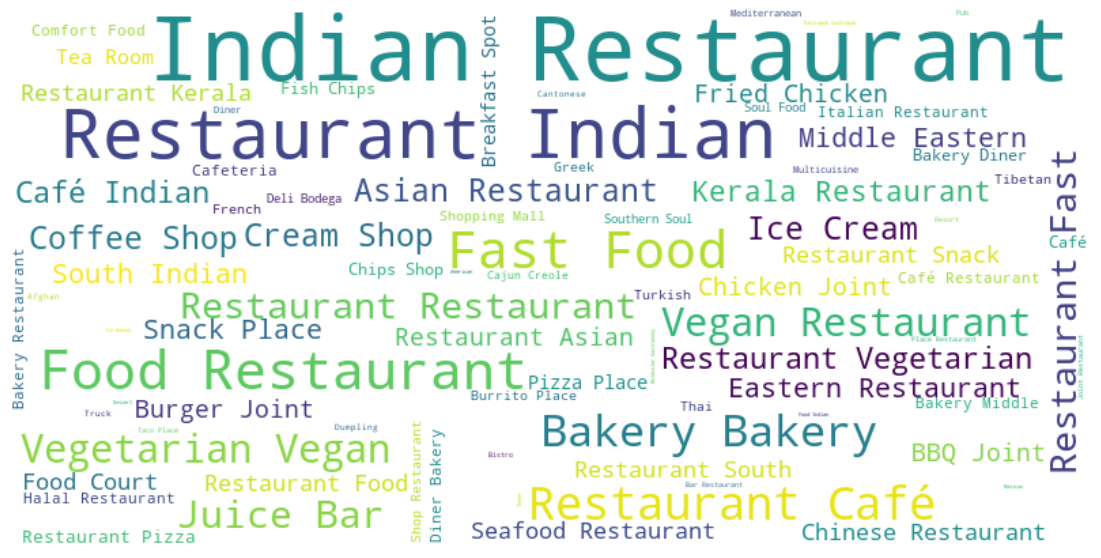

In [83]:
wordcloud3 = WordCloud(background_color='white', width=800, height=400).generate(' '.join(kochi_venues['Venue Category']))
plt.figure(figsize=[20,10])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

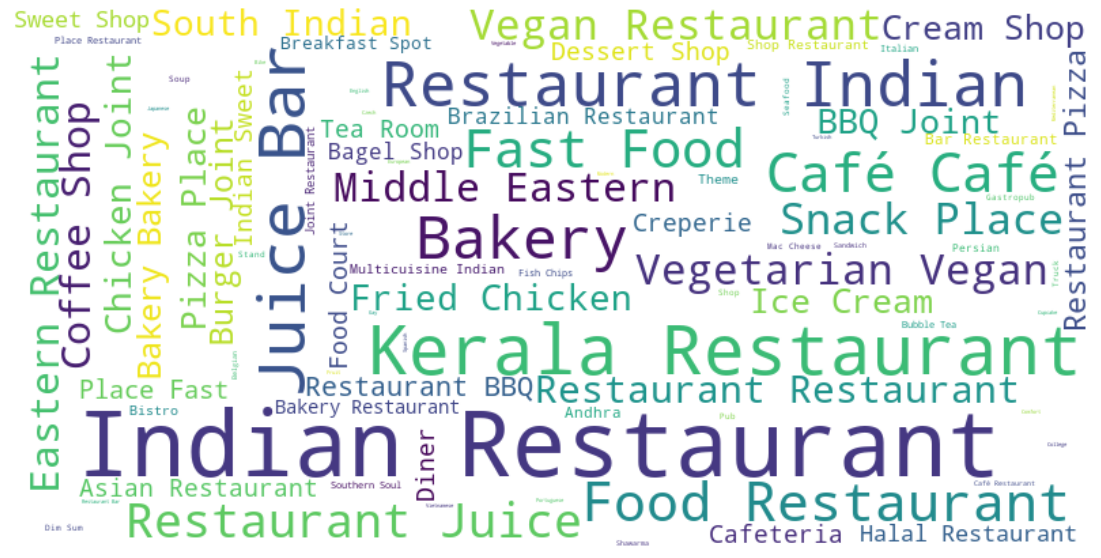

In [88]:


plt.figure(figsize=[20,10])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()